<a href="https://colab.research.google.com/github/Dhruvnet/Analysis-of-Top-1000-most-subscribed-yt-channel-/blob/main/NSDC_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dailyActivity - Sheet1.csv')
data.head(5)

,ActivityDate,TotalSteps,TotalDistance(in kms),Calories
0,04-12-2016,13162,8.50,1985
1,4/13/2016,10735,6.97,1797
2,4/14/2016,10460,6.74,1776
3,4/15/2016,9762,6.28,1745
4,4/16/2016,12669,8.16,1863


In [ ]:
data.tail(5)

,ActivityDate,TotalSteps,TotalDistance(in kms),Calories
935,05-08-2016,10686,8.110000,2847
936,05-09-2016,20226,18.250000,3710
937,05-10-2016,10733,8.150000,2832
938,05-11-2016,21420,19.559999,3832
939,05-12-2016,8064,6.120000,1849


In [ ]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate']).dt.strftime('%-m-%-d-%y')
data['TotalDistance(in kms)'] = data['TotalDistance(in kms)'].round(2).astype(str)
data.head(5)

,ActivityDate,TotalSteps,TotalDistance(in kms),Calories
0,4-12-16,13162,8.5,1985
1,4-13-16,10735,6.97,1797
2,4-14-16,10460,6.74,1776
3,4-15-16,9762,6.28,1745
4,4-16-16,12669,8.16,1863


In [ ]:
data.tail(5)

,ActivityDate,TotalSteps,TotalDistance(in kms),Calories
935,5-8-16,10686,8.11,2847
936,5-9-16,20226,18.25,3710
937,5-10-16,10733,8.15,2832
938,5-11-16,21420,19.56,3832
939,5-12-16,8064,6.12,1849


# **Data Science Task**

In [ ]:
#with no activity records
no_activity = data[data['TotalSteps'].isnull() | data['TotalSteps'].isin([0])]
print('Entries with no activity records : ', len(no_activity))

Entries with no activity records :  77


In [ ]:
# calories more than 2303
calories_high = data[data['Calories'] > 2303]
print('Entries with calories more than 2303 : ', len(calories_high))

Entries with calories more than 2303 :  396


In [ ]:
# calories less than 900
calories_low = data[data['Calories'] < 900]
print('Entries with calories less than 900 : ', len(calories_low))

Entries with calories less than 900 :  11


In [ ]:
data['TotalDistance(in kms)'] = pd.to_numeric(data['TotalDistance(in kms)'])

In [ ]:
# where total steps is more 12000 and distance is less than 8 kms
steps_high_distance_low = data[(data['TotalSteps'] > 12000) & (data['TotalDistance(in kms)'] < 8.00)]
print('Entries with steps greater 12000 and distance less than 8 kms: ', len(steps_high_distance_low))

Entries with steps greater 12000 and distance less than 8 kms:  5


In [ ]:
# Find count of entries where total steps is more 12000 and distance is less than 8 kms or calories is more than 3500
high_activity = data[(data['TotalSteps'] > 12000) & (data['TotalDistance(in kms)'] < 8.00) | (data['Calories'] > 3500)]
print('Entries with high activity : ', len(high_activity))

Entries with high activity :  67


# **Visulization**

In [ ]:
data = data.head(10)
data

,ActivityDate,TotalSteps,TotalDistance(in kms),Calories
0,4-12-16,13162,8.5,1985
1,4-13-16,10735,6.97,1797
2,4-14-16,10460,6.74,1776
3,4-15-16,9762,6.28,1745
4,4-16-16,12669,8.16,1863
5,4-17-16,9705,6.48,1728
6,4-18-16,13019,8.59,1921
7,4-19-16,15506,9.88,2035
8,4-20-16,10544,6.68,1786
9,4-21-16,9819,6.34,1775


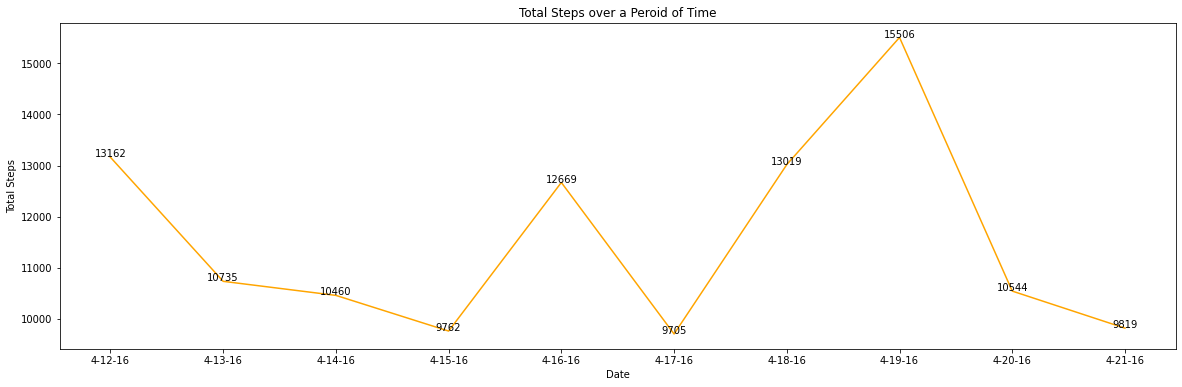

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data['ActivityDate'], data['TotalSteps'],color='orange')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.title('Total Steps over a Peroid of Time')
for i, v in enumerate(data['TotalSteps']):
  plt.text(i, v+10, str(v), ha='center')
plt.show()

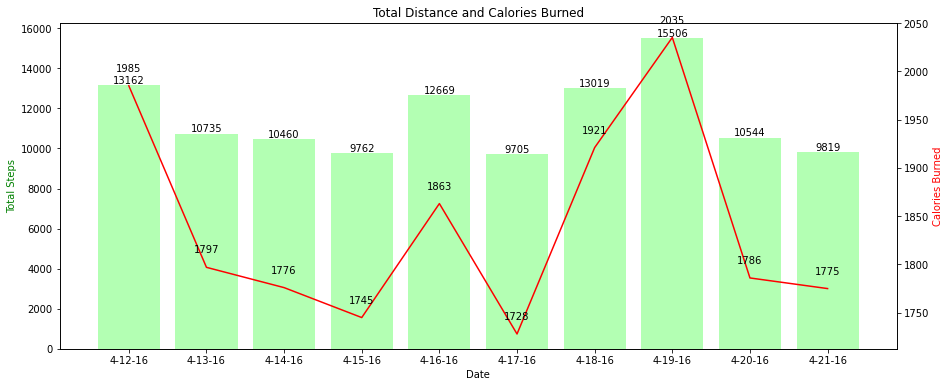

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Total Distance data on the first y-axis
ax1.bar(data['ActivityDate'], data['TotalSteps'], color=(0.7, 1.0, 0.7))
ax1.set_ylabel('Total Steps', color='green')
ax1.tick_params(axis='y')

# Create a second y-axis and plot Calories Burned data on it
ax2 = ax1.twinx()
ax2.plot(data['ActivityDate'], data['Calories'], color='red')
ax2.set_ylabel('Calories Burned', color='red')
ax2.tick_params(axis='y')

# Set x-axis label and title
ax1.set_xlabel('Date')
plt.title('Total Distance and Calories Burned')

for i, v in enumerate(data['TotalSteps']):
    ax1.text(i, v+100, str(v), ha='center')
for i, v in enumerate(data['Calories']):
    ax2.text(i, v+15, str(v), ha='center')

# Display the chart
plt.show()


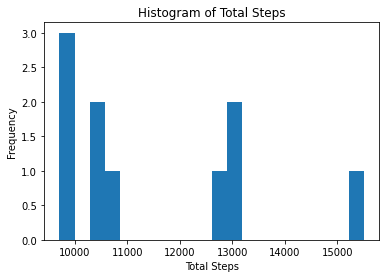

In [ ]:
# Create a histogram of TotalSteps column
plt.hist(data['TotalSteps'], bins=20)
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Total Steps')
plt.show()

In [ ]:
#area chart
# Convert the 'ActivityDate' column to a datetime object
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

# Set the 'ActivityDate' column as the index
data.set_index('ActivityDate', inplace=True)

# Create the area chart
data['TotalDistance(in kms)'].plot.area()

# Set the title and axis labels
plt.title('Daily Activity Summary')
plt.xlabel('Date')
plt.ylabel('Count')

# Show the plot
plt.show()


TypeError: ignored

Area charts are used to track changes over time for one or more groups. Area graphs are preferred over line charts when we want to capture the changes over time for more than 1 group.

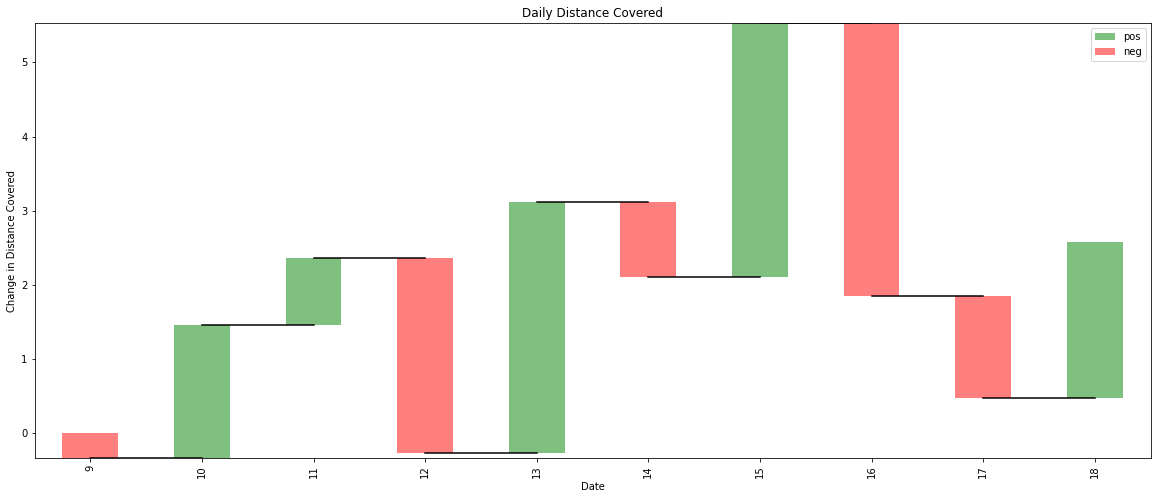

In [ ]:
# Convert the 'ActivityDate' column to a datetime type
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

# Calculate the change in distance covered from the previous day
data['DistanceDiff'] = data['TotalDistance(in kms)'].diff()

# Drop the first row, which has a NaN difference value
data = data.dropna()

def waterfall(series):
    # Create a DataFrame with positive and negative values
    df = pd.DataFrame({'pos': series[series >= 0], 'neg': series[series < 0]})
    # Calculate the cumulative sum of the series and shift it up by one
    blank = series.cumsum().shift(1).fillna(0)
    # Plot the bar chart with stacked positive and negative values
    df.head(10).plot(kind='bar', stacked=True, bottom=blank, color=['g', 'r'], alpha=0.5,figsize=(20, 8))
    # Create the steps in the chart
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan
    # Plot the steps as a black line
    plt.plot(step.index, step.values, 'k')

# Create the waterfall chart for the first 5 values
waterfall(data['DistanceDiff'].head(10))

# Add the aesthetics
plt.title('Daily Distance Covered')
plt.xlabel('Date')
plt.ylabel('Change in Distance Covered')

# Show the plot
plt.show()


A waterfall chart can be used to explain the gradual transition in value of a variable that is subjected to increments or decrements